In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import sys

module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils import load_nifti
from utils import resize
from utils import rotation
from utils import shear
from utils import zoom
from utils import shift
from utils import get_rand_z_chunk
from utils import show_sample
from utils import save_nifti

Using TensorFlow backend.


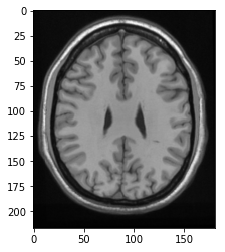

In [3]:
# Show sample.
scan = load_nifti('../data/brain.nii')
show_sample(scan, slc=100)

(181, 217, 181, 1)
(83, 100, 83, 1)


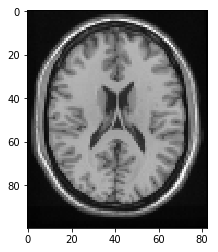

In [4]:
# Resize volume.
scan = load_nifti('../data/brain.nii')
print(scan.shape)
resized_scan = resize(scan, 100)
print(resized_scan.shape)
show_sample(resized_scan)

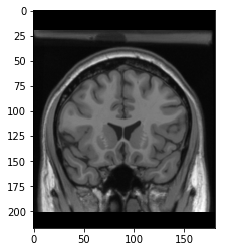

In [5]:
# Rotation around x-axis.
scan = load_nifti('../data/brain.nii')
scan = rotation(scan, 90., 0., 0.)
show_sample(scan)

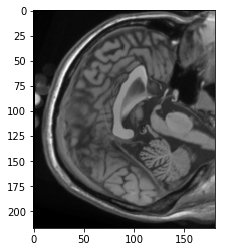

In [6]:
# Rotation around y-axis.
scan = load_nifti('../data/brain.nii')
scan = rotation(scan, 0., 90., 0.)
show_sample(scan)

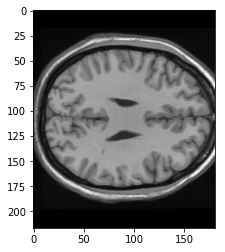

In [7]:
# Rotation around z-axis.
scan = load_nifti('../data/brain.nii')
scan = rotation(scan, 0., 0., 90.)
show_sample(scan, slc=100)

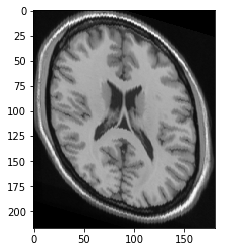

In [8]:
# Shear along x-axis in xy-plane.
scan = load_nifti('../data/brain.nii')
scan = shear(scan, 0.3, 0., 0., 0., 0., 0.)
show_sample(scan)

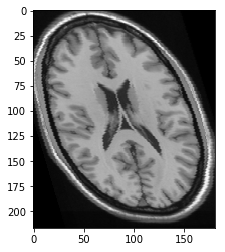

In [9]:
# Shear along y-axis in xy-plane.
scan = load_nifti('../data/brain.nii')
scan = shear(scan, 0., 0.3, 0., 0., 0., 0.)
show_sample(scan)

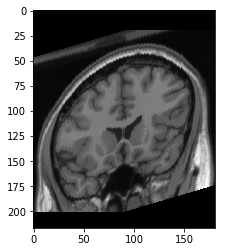

In [10]:
# Shear along x-axis in xz-plane.
scan = load_nifti('../data/brain.nii')
scan = shear(scan, 0., 0., 0.3, 0., 0., 0.)
# rotate around x-axis to see xz-plane
scan = rotation(scan, 90., 0., 0.)
show_sample(scan)

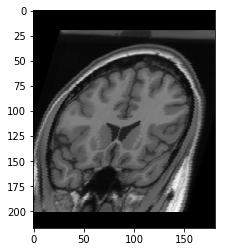

In [11]:
# Shear along z-axis in xz-plane.
scan = load_nifti('../data/brain.nii')
scan = shear(scan, 0., 0., 0., 0.3, 0., 0.)
# rotate around x-axis to see xz-plane
scan = rotation(scan, 90., 0., 0.)
show_sample(scan)

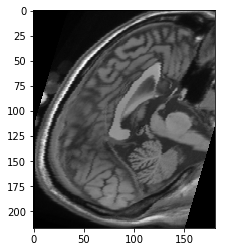

In [12]:
# Shear along y-axis in yz-plane.
scan = load_nifti('../data/brain.nii')
scan = shear(scan, 0., 0., 0., 0., 0.3, 0.)
# rotate around y-axis to see yz-plane
scan = rotation(scan, 0., 90., 0.)
show_sample(scan)

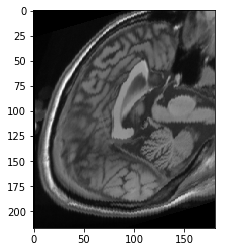

In [13]:
# Shear along z-axis in yz-plane
scan = load_nifti('../data/brain.nii')
scan = shear(scan, 0., 0., 0., 0., 0., 0.3)
# rotate around y-axis to see yz-plane
scan = rotation(scan, 0., 90., 0.)
show_sample(scan)

/Users/hagen/anaconda/envs/dev2/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


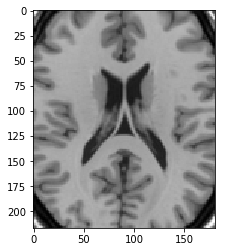

In [14]:
# Zoom in.
scan = load_nifti('../data/brain.nii')
scan = zoom(scan, 1.5)
show_sample(scan)

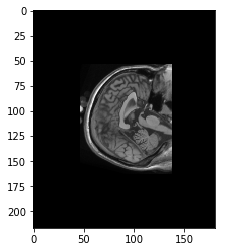

In [15]:
# Zoom out.
scan = load_nifti('../data/brain.nii')
scan = zoom(scan, 0.5)
# rotate around y-axis to see yz-plane
scan = rotation(scan, 0., 90., 0.)
show_sample(scan)

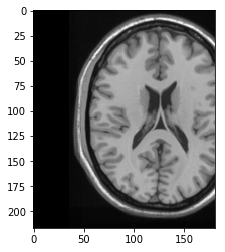

In [16]:
# Shift in x-direction.
scan = load_nifti('../data/brain.nii')
scan = shift(scan, 0.2, 0., 0.)
show_sample(scan)

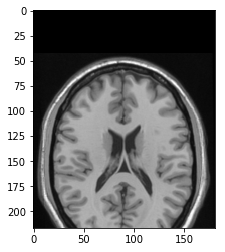

In [17]:
# Shift in y-direction.
scan = load_nifti('../data/brain.nii')
scan = shift(scan, 0., 0.2, 0.)
show_sample(scan)

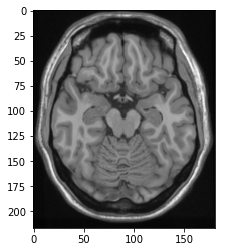

In [18]:
# Shift in z-direction
scan = load_nifti('../data/brain.nii')
scan = shift(scan, 0., 0., 0.2)
show_sample(scan)

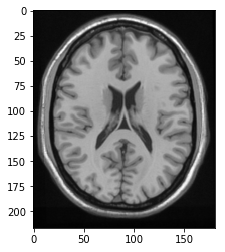

In [19]:
# Save to nifti and load again.
scan = load_nifti('../data/brain.nii')
save_nifti(scan, './temp/brain_saved.nii.gz')
scan_reloaded = load_nifti('./temp/brain_saved.nii.gz')
show_sample(scan_reloaded)